In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

### Set Seed

In [2]:
SEED = 42

### Load only train data

In [4]:
DATA_FOLDER_PATH = os.path.normpath(os.path.join("..", "data"))
medquad_train = pd.read_csv(os.path.join(DATA_FOLDER_PATH, "processed", "train.csv"))

### Perform split

In [23]:
n_rows = medquad_train.shape[0]
n_rows_desired = 5000
ratio = round(n_rows_desired / n_rows, 2)

In [24]:
ignore_subset, grpo_subset = train_test_split(
    medquad_train,
    test_size=ratio,
    random_state=SEED,
    stratify=medquad_train["focus_area"]
)

In [25]:
len(grpo_subset)

5021

### Preliminary checks

In [26]:
print(f"Final shape after split: {grpo_subset.shape}")

Final shape after split: (5021, 4)


In [27]:
grpo_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5021 entries, 9494 to 7462
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   question    5021 non-null   object
 1   answer      5021 non-null   object
 2   source      5021 non-null   object
 3   focus_area  5021 non-null   object
dtypes: object(4)
memory usage: 196.1+ KB


In [28]:
def get_focus_area_counts(medquad_df):
    return medquad_df \
        .groupby("focus_area") \
        .count()[["question"]] \
        .reset_index() \
        .sort_values(by="question", ascending=False)

def plot_focus_area_counts(ignore_subset, grpo_subset, num_top_areas=20):
    # Select the most common classes in ignore dataset
    counts_per_focus_area_ignore = get_focus_area_counts(medquad_df=ignore_subset).head(num_top_areas)
    counts_per_focus_area_ignore["dataset"] = "ignored"

    counts_per_focus_area_grpo = get_focus_area_counts(medquad_df=grpo_subset).head(num_top_areas)
    counts_per_focus_area_grpo["dataset"] = "grpo"

    counts_per_focus_area = pd.concat(
        [counts_per_focus_area_ignore, counts_per_focus_area_grpo], axis=0, ignore_index=True
    )

    plt.figure(figsize=(15, 10))

    sns.barplot(
        data=counts_per_focus_area,
        x="focus_area",
        y="question",
        hue="dataset"
    )

    plt.xticks(rotation=45, ha="right")
    plt.title("Top Focus Areas by Frequency")
    plt.xlabel("Focus Area")
    plt.ylabel("Number of Samples")
    plt.show()

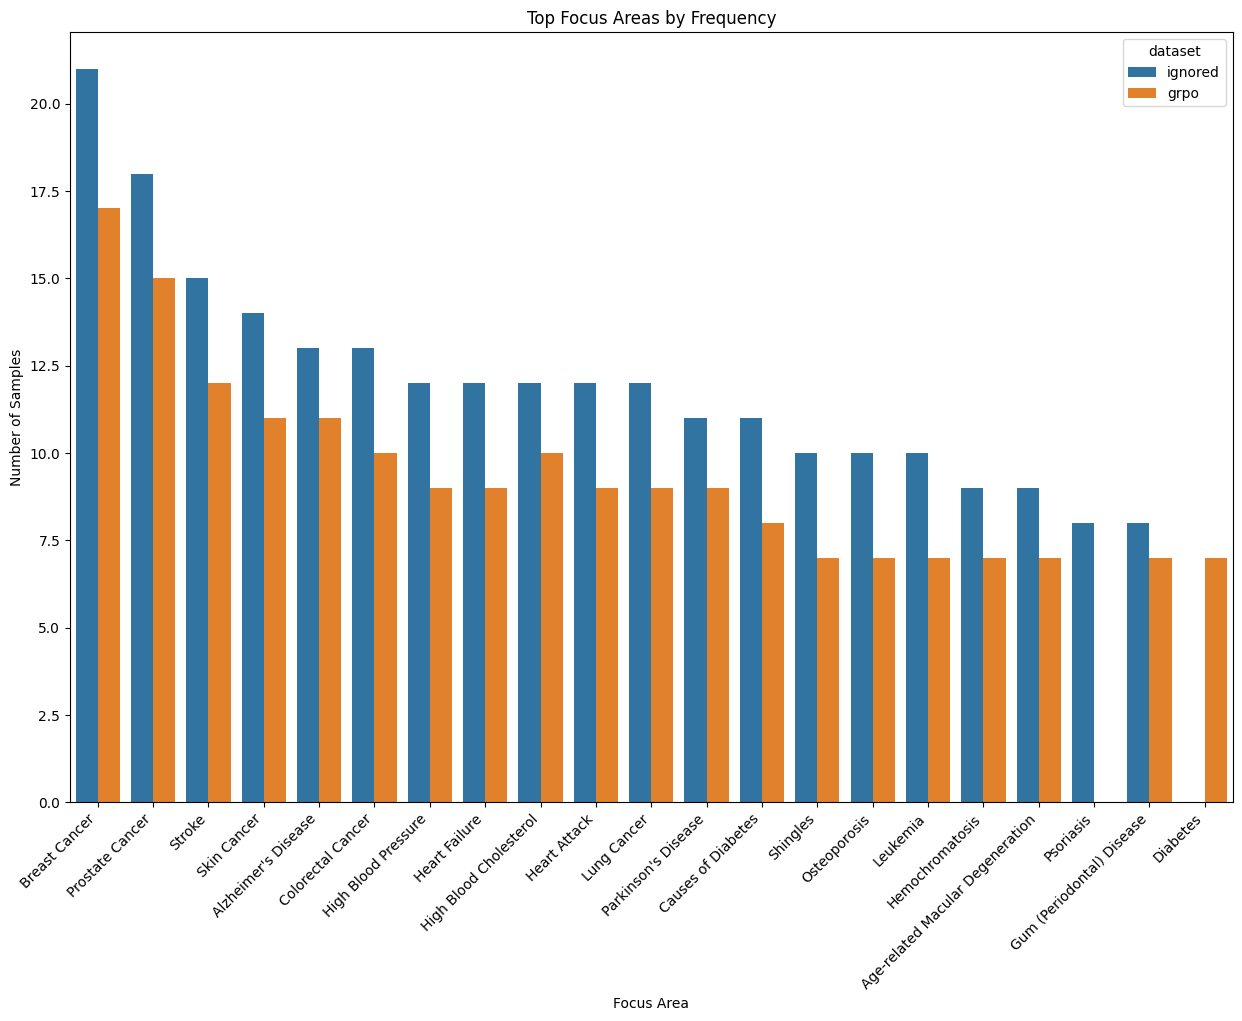

In [29]:
plot_focus_area_counts(
    ignore_subset=ignore_subset,
    grpo_subset=grpo_subset
)

In [30]:
# export only grpo subset as csv
PROCESSED_DATA_PATH = os.path.join(DATA_FOLDER_PATH, "grpo")
os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)
grpo_subset.to_csv(os.path.join(PROCESSED_DATA_PATH, "grpo_train.csv"), index=False)